Méthodes d'ensemble
===================

**Author:** Laurent Siksous




# Table des matières







## Preamble



### Imports



In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error

# Out[18]:

    # Out[2]:



### Functions



In [1]:
# Display all
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        display(df)

# Out[19]:

### Org



In [1]:
# Org-mode table formatter
import IPython
import tabulate

class OrgFormatter(IPython.core.formatters.BaseFormatter):
    format_type = IPython.core.formatters.Unicode('text/org')
    print_method = IPython.core.formatters.ObjectName('_repr_org_')

def pd_dataframe_to_org(df):
    return tabulate.tabulate(df, headers='keys', tablefmt='orgtbl', showindex='always')

ip = get_ipython()
ip.display_formatter.formatters['text/org'] = OrgFormatter()

f = ip.display_formatter.formatters['text/org']
f.for_type_by_name('pandas.core.frame', 'DataFrame', pd_dataframe_to_org)

# Out[20]:

## Data Wrangling



### Load Data



In [1]:
raw = fetch_california_housing(as_frame=True)

# Store features matrix in X
X = raw.data.to_numpy()

# Store target vector in 
y = raw.target

df_raw = pd.DataFrame(data = np.c_[raw['data'], raw['target']],
                  columns = raw['feature_names'] + ['AvePrice'])

display_all(df_raw.describe(include='all').T)

# Out[21]:
|            |   count |       mean |         std |         min |        25% |        50% |        75% |         max |
|------------+---------+------------+-------------+-------------+------------+------------+------------+-------------|
| MedInc     |   20640 |    3.87067 |    1.89982  |    0.4999   |    2.5634  |    3.5348  |    4.74325 |    15.0001  |
| HouseAge   |   20640 |   28.6395  |   12.5856   |    1        |   18       |   29       |   37       |    52       |
| AveRooms   |   20640 |    5.429   |    2.47417  |    0.846154 |    4.44072 |    5.22913 |    6.05238 |   141.909   |
| AveBedrms  |   20640 |    1.09668 |    0.473911 |    0.333333 |    1.00608 |    1.04878 |    1.09953 |    34.0667  |
| Population |   20640 | 1425.48    | 1132.46     |    3        |  787       | 1166       | 1725       | 35682       |
| AveOccup   |   20640 |    3.07066 |   10.386    |    0.692308 |    2.42974 |    2.81812 |    3.28226 |  1243.33    |
| Latitude   |   20640 |   35.6319  |

In [1]:
df_raw.dtypes

# Out[22]:
#+BEGIN_EXAMPLE
  MedInc        float64
  HouseAge      float64
  AveRooms      float64
  AveBedrms     float64
  Population    float64
  AveOccup      float64
  Latitude      float64
  Longitude     float64
  AvePrice      float64
  dtype: object
#+END_EXAMPLE

### Desciption des données



-   Affichons la description des données :



In [1]:
print(raw.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

# Out[24]:

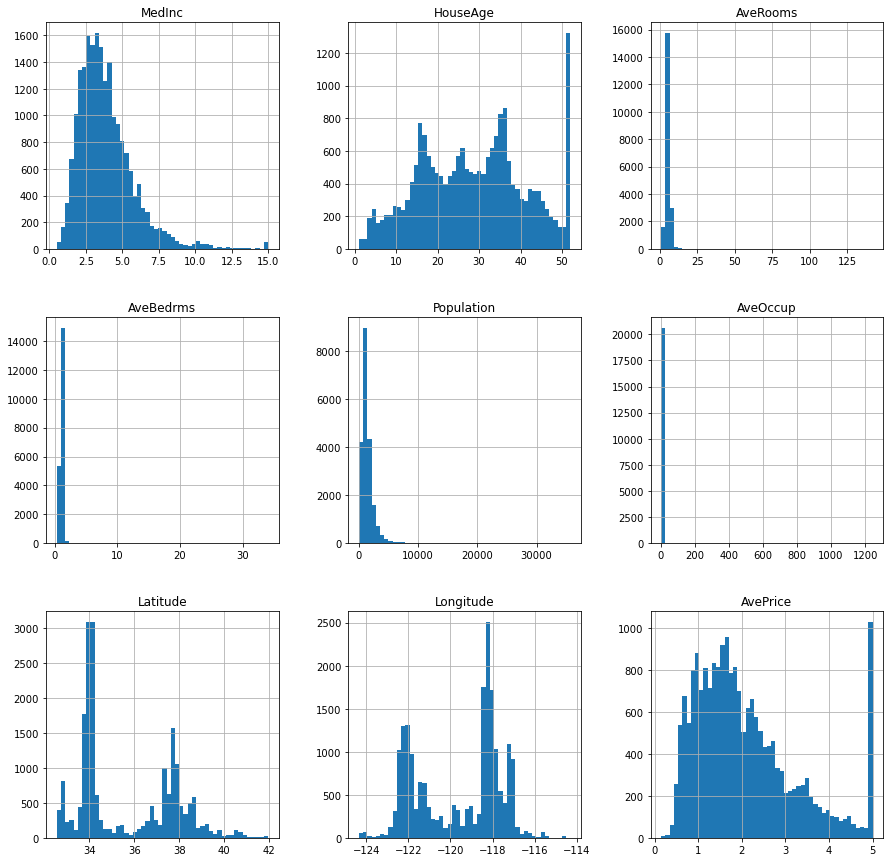

In [1]:
df_raw.hist(bins=50, figsize=(15,15))
plt.show()

### Split the Data



In [1]:
train, test = train_test_split(df_raw, test_size=0.2, random_state=42, shuffle=True)

# Out[25]:

In [1]:
# save the train and test file
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)

# Out[26]:

## Bibliography



### References:PROPERTIES:




[california.bib](california.bib)

